# Visible Watermark Information Classification

This notebook is used together with the VWIC dataset to test the performance
of the YOLO v8 pre-trained model from Ultralytics.  The model will be fine-tuned
on the VWIC dataset.

## YOLO (v8) by Ultralytics

Reference: https://docs.ultralytics.com/modes/train



### Load and Fine-Tune the Model

In [ ]:
from ultralytics import YOLO

YAML_CONFIG = "data.yaml"
TRAIN_DIR = "runs/train"

model = YOLO(model="yolov8s.pt") # select appropriate size model to fine-tune based on your dataset/task.

model.train(
    data=YAML_CONFIG,
    epochs=150,
    batch=8,
    imgsz=640,
    lr0=0.01, # initial learning rate
    patience=10,  # patience for early stopping callback
)

New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.62 🚀 Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=150, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

RuntimeError: Dataset 'data.yaml' error ❌ 
Dataset 'data.yaml' images not found ⚠️, missing path '/home/gb/FinalProject/ultralytics-2/datasets/visible-watermark-information-classification-voc2007.v9i.yolov8/valid'
Note dataset download directory is '/home/gb/FinalProject/ultralytics-2/datasets'. You can update this in '/home/gb/.config/Ultralytics/settings.json'

In [1]:
print(f"Model: {model.model_name}")
print(f"Model Info: {model.info(detailed=True)}")
model.save(filename="models/best.pt")

NameError: name 'model' is not defined

#### Results

![Results](runs/detect/train/results.png)

![Confustion Matrix](runs/detect/train/confusion_matrix_normalized.png)


image 1/1 /home/gb/vwic/yolov8_ultralytics/datasets/visible-watermark-detection-VOC2007.v4i.yolov8/test/images/009318_jpg.rf.d9a29deb1e47c720437ef989e79ba477.jpg: 640x640 1 contact, 1 identifier, 1 logo, 1 notice, 180.3ms
Speed: 1.8ms preprocess, 180.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


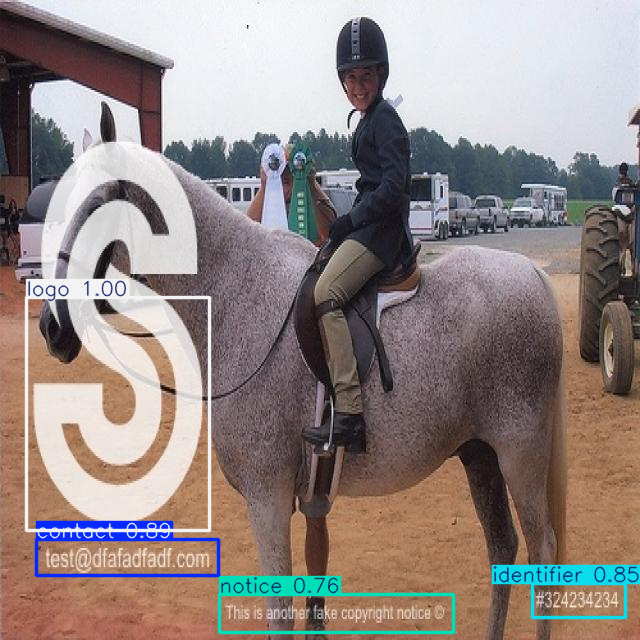

In [ ]:
TEST_IMAGE = "./datasets/visible-watermark-detection-VOC2007.v4i.yolov8/test/images/009318_jpg.rf.d9a29deb1e47c720437ef989e79ba477.jpg"

model = YOLO("models/best.pt")  # Path to your saved model

results = model.predict(
    source=TEST_IMAGE,
    conf=0.7,  # confidence threshold
    save=False,  # no need to save results, just display below.
    imgsz=640,
    device='cpu',
)

# Process results list
for result in results:
    result.show()  # display to screen